<a href="https://colab.research.google.com/github/Saimeghanakancharla/AdaptReady_TimeSeries_Challenge_Assignment/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading the datasets

In [60]:
import os
import IPython.display

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
train_df = pd.read_csv('/content/sample_data/train.csv')
test_df = pd.read_csv('/content/sample_data/test.csv')



Converting the 'date' coloumn into datatime object

In [61]:
train_df['date'] = pd.to_datetime(train_df['date'], format='%Y-%m-%d %H:%M:%S')

train_df.set_index('date', inplace=True)

test_df['date'] = pd.to_datetime(test_df['date'], format='%Y-%m-%d %H:%M:%S')
test_df.head()


,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,2018-06-27 00:00:00,37.695999,11.057,46.964001,11.285,-9.755,-1.546,32.192501
1,2018-06-27 01:00:00,34.596001,9.885,44.498001,10.508,-9.808,-1.546,31.973000
2,2018-06-27 02:00:00,33.591000,9.717,44.283001,10.749,-11.162,-1.546,31.973000
3,2018-06-27 03:00:00,34.764000,10.555,45.382000,11.258,-9.947,-1.546,31.753000
4,2018-06-27 04:00:00,33.256001,10.303,43.908001,11.205,-9.990,-1.621,32.192501


Resampling the 15 min intervals into 1 hour in train dataset

In [62]:
train_hourly = train_df.resample('H').mean()
train_hourly.reset_index(inplace=True)

train_hourly.head()

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,2016-07-01 00:00:00,5.77675,1.99225,1.51875,0.42625,4.23375,1.34025,29.510500
1,2016-07-01 01:00:00,5.42500,1.92525,1.41225,0.37300,3.99750,1.31725,27.558500
2,2016-07-01 02:00:00,5.15700,1.82475,1.32350,0.39950,3.78450,1.23350,27.540751
3,2016-07-01 03:00:00,5.24075,1.92525,1.42125,0.45300,3.79950,1.26400,23.671750
4,2016-07-01 04:00:00,5.45850,1.99225,1.49200,0.46175,3.92900,1.31725,21.807500


Plotting of oil temperature against date

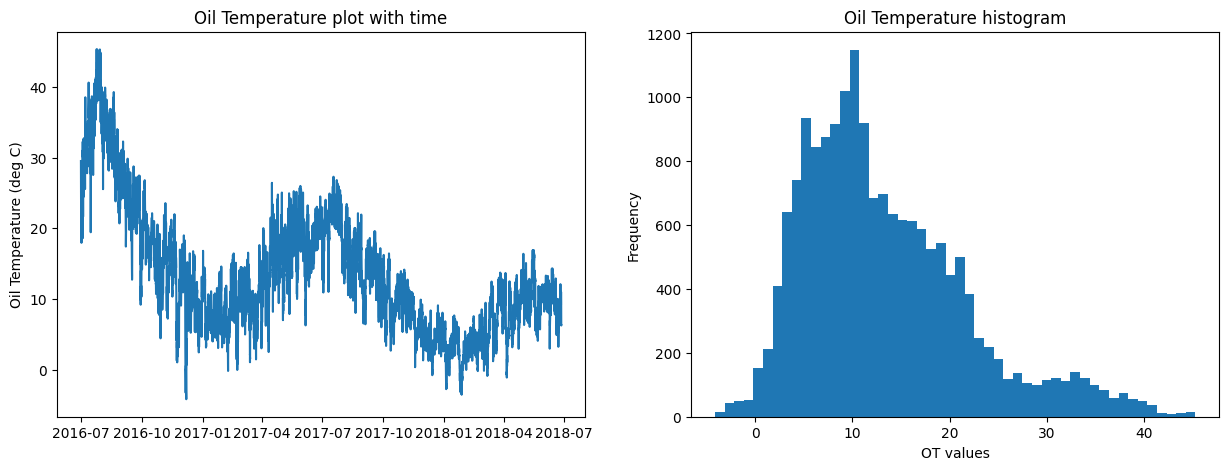

In [63]:
fig, axs = plt.subplots(1,2, figsize=(15,5))

plot_col = train_hourly[['OT']]
plot_col.index = train_hourly['date']
axs[0].plot(plot_col.index, plot_col)
axs[1].set_xlabel('Date')
axs[0].set_ylabel('Oil Temperature (deg C)')
axs[0].set_title('Oil Temperature plot with time')

axs[1].hist(train_hourly['OT'], bins=50)
axs[1].set_xlabel('OT values')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Oil Temperature histogram')
plt.show()

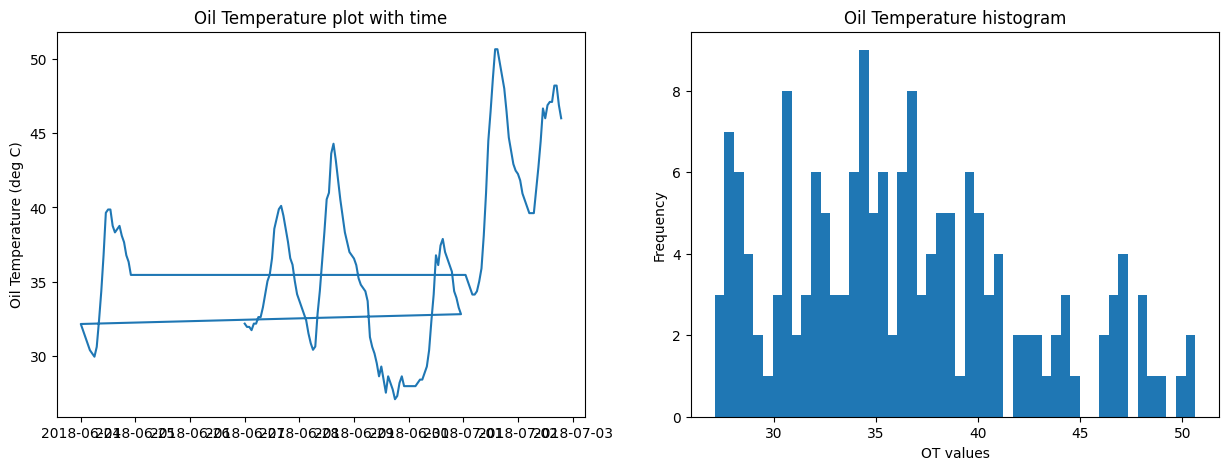

In [64]:
fig, axs = plt.subplots(1,2, figsize=(15,5))

plot_col = test_df[['OT']]
plot_col.index = test_df['date']
axs[0].plot(plot_col.index, plot_col)
axs[1].set_xlabel('Date')
axs[0].set_ylabel('Oil Temperature (deg C)')
axs[0].set_title('Oil Temperature plot with time')

axs[1].hist(test_df['OT'], bins=50)
axs[1].set_xlabel('OT values')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Oil Temperature histogram')
plt.show()

Calculating Missing values

In [65]:
missing_values = train_hourly.isnull().sum()
missing_values_temperatures = train_hourly[['HUFL', 'HULL', 'MUFL', 'MULL', 'LUFL', 'LULL']].isnull().sum()
print("Missing values in each column:")
print(missing_values)

print("\nMissing temperature values:")
print(missing_values_temperatures)

Missing values in each column:
date    0
HUFL    0
HULL    0
MUFL    0
MULL    0
LUFL    0
LULL    0
OT      0
dtype: int64

Missing temperature values:
HUFL    0
HULL    0
MUFL    0
MULL    0
LUFL    0
LULL    0
dtype: int64


In [66]:
missing_values = test_df.isnull().sum()
missing_values_temperatures = test_df[['HUFL', 'HULL', 'MUFL', 'MULL', 'LUFL', 'LULL']].isnull().sum()
print("Missing values in each column:")
print(missing_values)

print("\nMissing temperature values:")
print(missing_values_temperatures)

Missing values in each column:
date    0
HUFL    0
HULL    0
MUFL    0
MULL    0
LUFL    0
LULL    0
OT      0
dtype: int64

Missing temperature values:
HUFL    0
HULL    0
MUFL    0
MULL    0
LUFL    0
LULL    0
dtype: int64


Plotting correlation matrix

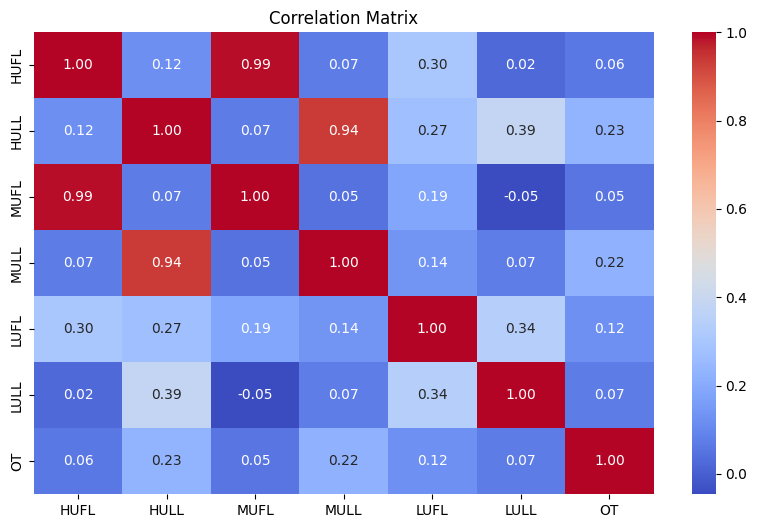

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Exclude the 'date' column from correlation calculation
correlation_matrix = train_hourly.drop(columns=['date']).corr()

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

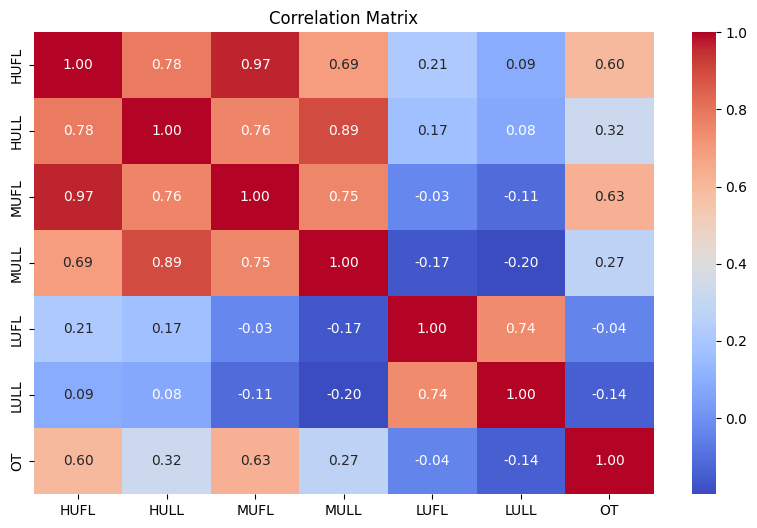

In [68]:
# Drop the 'date' column and calculate the correlation matrix
correlation_matrix = test_df.drop(columns=['date']).corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Plotting of oil temperature against hours of the day

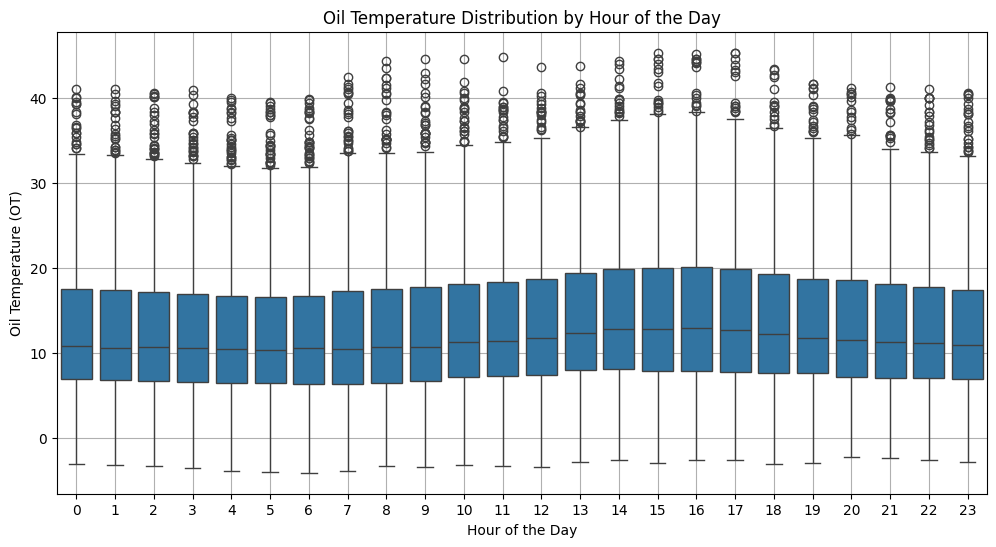

In [69]:
train_hourly['hour'] = train_hourly['date'].dt.hour

plt.figure(figsize=(12, 6))
sns.boxplot(x='hour', y='OT', data=train_hourly)
plt.title('Oil Temperature Distribution by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Oil Temperature (OT)')
plt.grid()
plt.show()

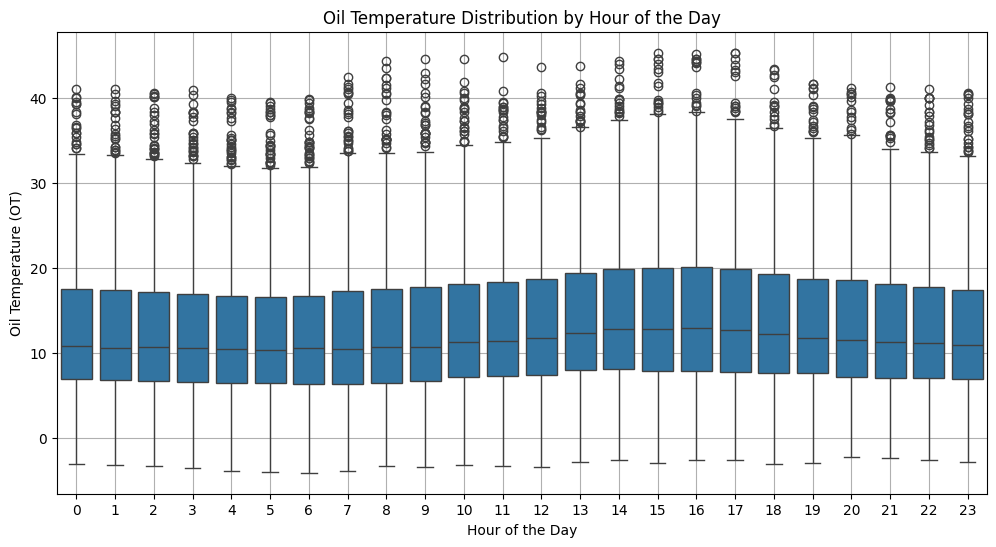

In [70]:
test_df['hour'] = test_df['date'].dt.hour

plt.figure(figsize=(12, 6))
sns.boxplot(x='hour', y='OT', data=train_hourly)
plt.title('Oil Temperature Distribution by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Oil Temperature (OT)')
plt.grid()
plt.show()

Splitting of train_hourly dataset into train and validation sets

In [71]:
from sklearn.model_selection import train_test_split
n = len(train_hourly)
train_hourly_set = train_hourly[0:int(n*0.8)]
val_hourly_set = train_hourly[int(n*0.8):]

Normalisation of train, validation and test datasets

In [72]:
train_mean = train_hourly_set.mean()
train_std = train_hourly_set.std()
test_mean = test_df.mean()
test_std = test_df.std()
train_hourly_set = (train_hourly_set - train_mean)/train_std
val_hourly_set = (val_hourly_set - train_mean)/train_std
test_df = (test_df -test_mean )/test_std

<ipython-input-72-6b5bfc80ffe4>:5: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized.
  train_hourly_set = (train_hourly_set - train_mean)/train_std
<ipython-input-72-6b5bfc80ffe4>:6: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized.
  val_hourly_set = (val_hourly_set - train_mean)/train_std
<ipython-input-72-6b5bfc80ffe4>:7: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized.
  test_df = (test_df -test_mean )/test_std


We are using sliding-window approach to transform the problem of time series forecasting into a supervised learning problem

In [73]:
class SlidingWindowGenerator():

    def __init__(self, input_width, label_width, offset,
                 train, val, test, label_columns=None):

        self.train_data = train
        self.val_data = val
        self.test_data = test

        self.label_columns = label_columns

        if label_columns is not None:
            self.label_columns_indices = {name:i for i, name in enumerate(label_columns)}

        self.column_indices = {name:i for i, name in enumerate(train_hourly_set.columns)}

        self.input_width = input_width
        self.label_width = label_width
        self.offset = offset

        self.total_window_length = input_width + offset

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_length)[self.input_slice]

        self.label_start = self.total_window_length - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_length)[self.labels_slice]

    def split_window(self, data):
        inputs = data[:, self.input_slice,:]
        labels = data[:, self.labels_slice, :]
        if self.label_columns is not None:
            labels = tf.stack(
                [labels[:, :,self.column_indices[name]] for name in self.label_columns],
                axis=-1)

        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])

        return inputs, labels

    def make_dataset(self, data):
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.utils.timeseries_dataset_from_array(
            data=data,
            targets=None,
            sequence_length=self.total_window_length,
            sequence_stride=1,
            shuffle=False,
            batch_size=32,)

        ds = ds.map(self.split_window)

        return ds

    def plot(self, inputs, labels, model=None, plot_col='OT', max_subplots=3):
        plt.figure(figsize=(12, 8))
        plot_col_index = self.column_indices[plot_col]
        max_n = min(max_subplots, len(inputs))
        for n in range(max_n):
            plt.subplot(max_n, 1, n+1)
            plt.ylabel(f'{plot_col} (normalized)')
            plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                    label='Inputs', marker='.', zorder=-10)

            if self.label_columns:
                label_col_index = self.label_columns_indices.get(plot_col, None)
            else:
                label_col_index = plot_col_index

            if label_col_index is None:
                continue

            plt.scatter(self.label_indices, labels[n, :, label_col_index],
                        edgecolors='k', label='Labels', c='#2ca02c', s=64)
            if model is not None:
                predictions = model.predict(inputs)
                plt.scatter(self.label_indices, predictions[n,label_col_index],
                            marker='X', edgecolors='k', label='Predictions',
                            c='#ff7f0e', s=64)

            if n == 0:
                plt.legend()

        plt.xlabel('Time')

    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_length}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.label_columns}'])

    @property
    def train(self):
        return self.make_dataset(self.train_data)

    @property
    def val(self):
        return self.make_dataset(self.val_data)

    @property
    def test(self):
        return self.make_dataset(self.test_data)

FeedForward Model

In [74]:
simple_window = SlidingWindowGenerator(input_width=10,label_width=1, offset=1, train=train_hourly_set, val=val_hourly_set, test=test_df,  label_columns=['OT'])

simple_window


Total window size: 11
Input indices: [0 1 2 3 4 5 6 7 8 9]
Label indices: [10]
Label column name(s): ['OT']

In [75]:
import tensorflow as tf
for input, label in simple_window.test.take(1):
    input_x = input
    label_y = label
    print('Input data shape:', input.shape)
    print('Label shape:', label.shape)

Input data shape: (32, 10, 9)
Label shape: (32, 1, 1)


Making layers for the model with activation function relu

In [76]:
from tensorflow import keras
from tensorflow.keras import layers


simple_model =  keras.Sequential(
    [
        keras.Input(shape=(10, 9)),
        layers.Dense(units=64, activation='relu', name='first_layer'),
        layers.Dense(units=64, activation='relu', name='second_layer'),
        layers.Flatten(),
        layers.Dense(units=1, activation='relu', name='third_layer')
    ]
)

simple_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ first_layer (Dense)                  │ (None, 10, 64)              │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ second_layer (Dense)                 │ (None, 10, 64)              │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 640)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ third_layer (Dense)                  │ (None, 1)                   │             641 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,441 (21.25 KB)

 Trainable params: 5,441 (21.25 KB)

 Non-trainable params: 0 (0.00 B)

In [77]:
MAX_EPOCHS = 10

def compile_and_fit(model, window):

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val)
  return history

Compiling and fitting the model

In [78]:
h = compile_and_fit(simple_model, simple_window)

Epoch 1/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.3104 - mean_absolute_error: 0.4377 - val_loss: 0.7693 - val_mean_absolute_error: 0.7915
Epoch 2/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.2720 - mean_absolute_error: 0.4018 - val_loss: 0.7693 - val_mean_absolute_error: 0.7915
Epoch 3/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.2326 - mean_absolute_error: 0.3550 - val_loss: 0.7692 - val_mean_absolute_error: 0.7913
Epoch 4/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.2052 - mean_absolute_error: 0.3117 - val_loss: 0.7693 - val_mean_absolute_error: 0.7914
Epoch 5/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1968 - mean_absolute_error: 0.2941 - val_loss: 0.7693 - val_mean_absolute_error: 0.7914
Epoch 6/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.1963 - mean_absolute_error: 0.2931 - val_loss: 0.7692 - val_mean_absolute_error: 0.7912
Epoch 7/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.1900 - mean_absolute_error: 0.2788 -

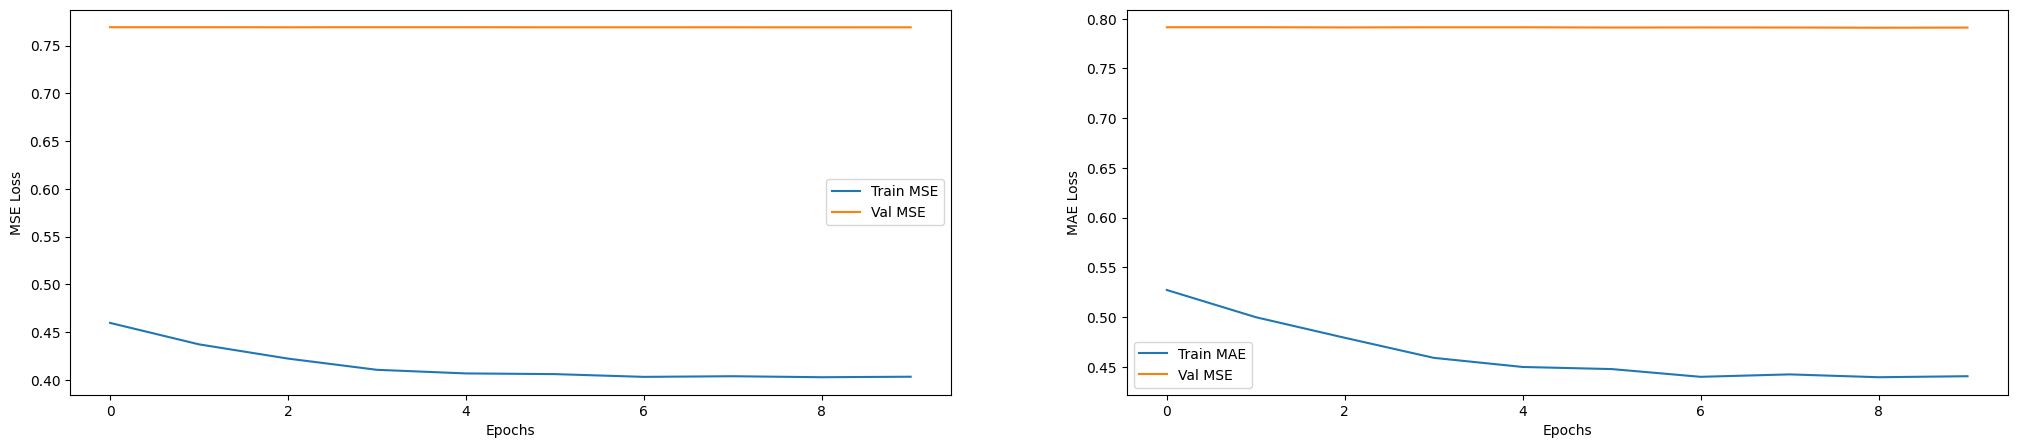

In [79]:
fig, axs = plt.subplots(1,2, figsize=(25,5))
metrics = list(h.history.keys())

axs[0].plot(h.history['loss'], label='Train MSE')
axs[0].plot(h.history['val_loss'], label='Val MSE')
axs[0].set_ylabel('MSE Loss')
axs[0].set_xlabel('Epochs')
axs[0].legend()

axs[1].plot(h.history['mean_absolute_error'], label='Train MAE')
axs[1].plot(h.history['val_mean_absolute_error'], label='Val MSE')
axs[1].set_ylabel('MAE Loss')
axs[1].set_xlabel('Epochs')
axs[1].legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


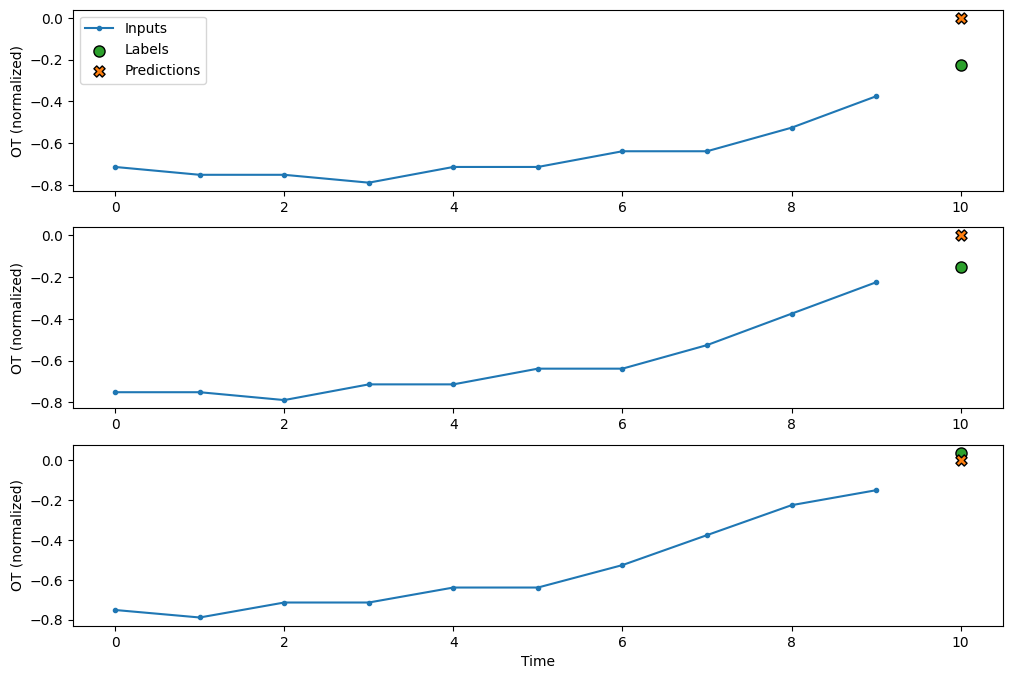

In [80]:

simple_window.plot(input_x, label_y, simple_model)

Convolution Model

In [81]:
cnn_window = SlidingWindowGenerator(input_width=10, label_width=1, offset=1, train=train_hourly_set, val=val_hourly_set, test=test_df, label_columns=['OT'])

cnn_window

Total window size: 11
Input indices: [0 1 2 3 4 5 6 7 8 9]
Label indices: [10]
Label column name(s): ['OT']

In [82]:
for input, label in cnn_window.test.take(1):
    input_x = input
    label_y = label
    print('Input Shape:', input.shape)
    print('Output Shape:', label.shape)

Input Shape: (32, 10, 9)
Output Shape: (32, 1, 1)


In [84]:
# kernel size is same as input because we want to predict the label accounting for all the input. If kernel size is smaller than input then you would need to add more layers so that the entire input is covered to predict the label
cnn_model = keras.Sequential(
    [
        keras.Input(shape=(10,9)),
        layers.Conv1D(filters=32, kernel_size=(10,),activation='relu'),
        layers.Dense(units=32, activation='relu'),
        layers.Dense(units=1)
    ]
)

cnn_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)                    │ (None, 1, 32)               │           2,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1, 32)               │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1, 1)                │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,001 (15.63 KB)

 Trainable params: 4,001 (15.63 KB)

 Non-trainable params: 0 (0.00 B)

In [85]:
h_cnn = compile_and_fit(cnn_model, cnn_window)

Epoch 1/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.3789 - mean_absolute_error: 0.4365 - val_loss: 0.0417 - val_mean_absolute_error: 0.1559
Epoch 2/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0949 - mean_absolute_error: 0.2253 - val_loss: 0.0580 - val_mean_absolute_error: 0.1988
Epoch 3/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0577 - mean_absolute_error: 0.1790 - val_loss: 0.0188 - val_mean_absolute_error: 0.1053
Epoch 4/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0607 - mean_absolute_error: 0.1783 - val_loss: 0.0385 - val_mean_absolute_error: 0.1609
Epoch 5/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0346 - mean_absolute_error: 0.1375 - val_loss: 0.0188 - val_mean_absolute_error: 0.1016
Epoch 6/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0365 - mean_absolute_error: 0.1415 - val_loss: 0.0156 - val_mean_absolute_error: 0.0931
Epoch 7/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0284 - mean_absolute_error: 0.1249 - v

In [86]:
cnn_model.predict(cnn_window.test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


array([[[-3.79698366e-01]],

       [[-8.98905769e-02]],

       [[-1.84379935e-01]],

       [[ 1.60464734e-01]],

       [[ 3.25376809e-01]],

       [[ 4.76027489e-01]],

       [[ 5.17339706e-01]],

       [[ 6.80882633e-01]],

       [[ 7.23092914e-01]],

       [[ 6.36925459e-01]],

       [[ 4.68754679e-01]],

       [[ 1.76681757e-01]],

       [[ 7.45088980e-02]],

       [[-4.70153391e-02]],

       [[ 5.19039109e-04]],

       [[-1.73123747e-01]],

       [[-5.12124777e-01]],

       [[-6.31271005e-01]],

       [[-5.10513425e-01]],

       [[-5.11536300e-01]],

       [[-8.68244827e-01]],

       [[-1.04454291e+00]],

       [[-9.41467762e-01]],

       [[-1.07284927e+00]],

       [[-4.85598385e-01]],

       [[-3.64486456e-01]],

       [[ 3.59979153e-01]],

       [[ 3.55616570e-01]],

       [[ 5.61891139e-01]],

       [[ 6.47440076e-01]],

       [[ 9.18536484e-01]],

       [[ 9.89686072e-01]],

       [[ 7.65048325e-01]],

       [[ 6.96314633e-01]],

       [[ 5.58

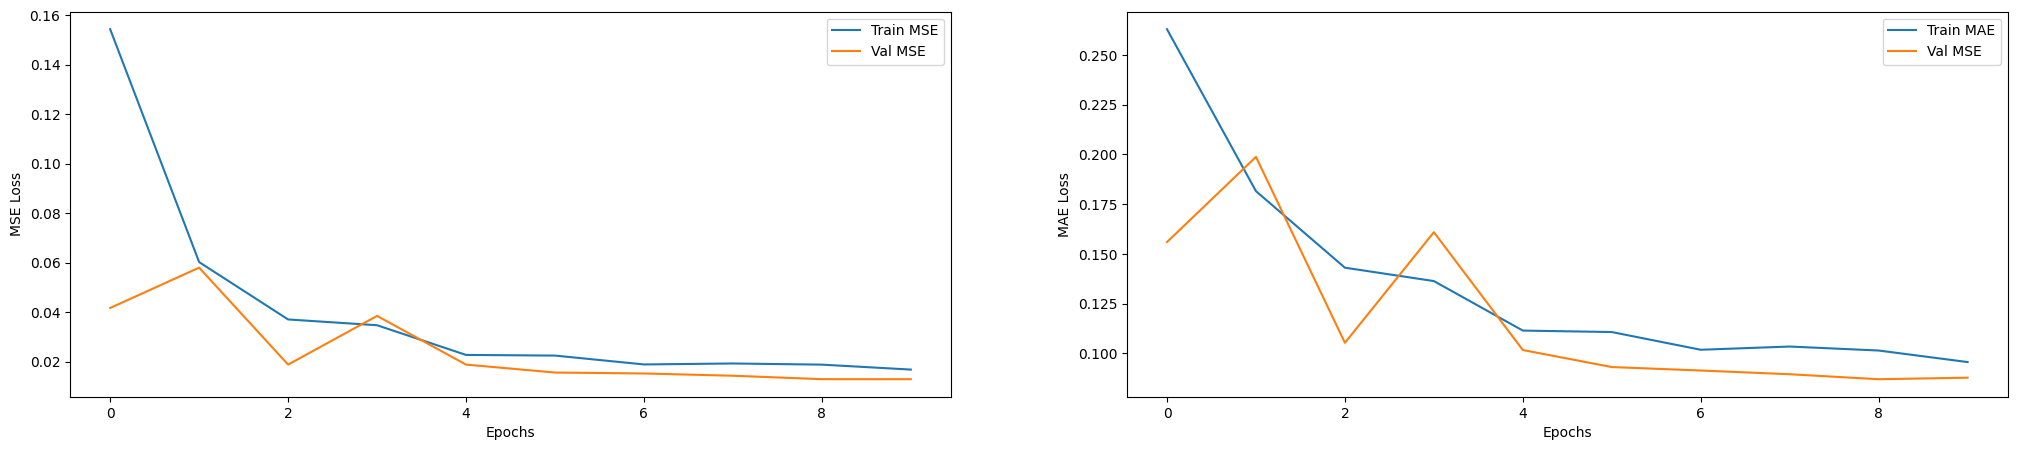

In [87]:
fig, axs = plt.subplots(1,2, figsize=(25,5))
metrics = list(h.history.keys())

axs[0].plot(h_cnn.history['loss'], label='Train MSE')
axs[0].plot(h_cnn.history['val_loss'], label='Val MSE')
axs[0].set_ylabel('MSE Loss')
axs[0].set_xlabel('Epochs')
axs[0].legend()

axs[1].plot(h_cnn.history['mean_absolute_error'], label='Train MAE')
axs[1].plot(h_cnn.history['val_mean_absolute_error'], label='Val MSE')
axs[1].set_ylabel('MAE Loss')
axs[1].set_xlabel('Epochs')
axs[1].legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


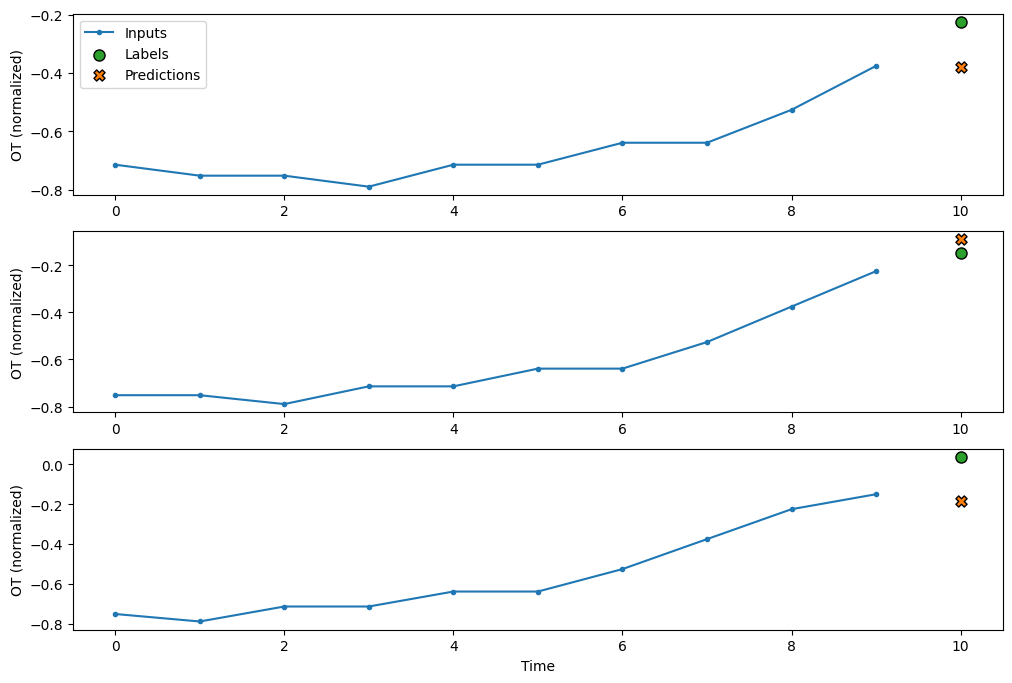

In [88]:
cnn_window.plot(input_x, label_y, cnn_model)

Recurrent Model(LSTM)

In [89]:
rnn_window = SlidingWindowGenerator(input_width=10, label_width=1, offset=1, train=train_hourly_set, val=val_hourly_set, test=test_df, label_columns=['OT'])

rnn_window

Total window size: 11
Input indices: [0 1 2 3 4 5 6 7 8 9]
Label indices: [10]
Label column name(s): ['OT']

In [90]:
for input, label in rnn_window.test.take(1):
    input_x = input
    label_y = label
    print('Input Shape:', input.shape)
    print('Output Shape:', label.shape)

Input Shape: (32, 10, 9)
Output Shape: (32, 1, 1)


In [91]:
rnn_model = keras.Sequential(
    [
        keras.Input(shape=(10,9)),
        layers.LSTM(16, activation='relu',recurrent_activation='hard_sigmoid', return_sequences=True),
        layers.LSTM(16, activation='relu',recurrent_activation='hard_sigmoid'),
        layers.Dense(1)
    ]
)

rnn_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 10, 16)              │           1,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 16)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,793 (14.82 KB)

 Trainable params: 3,793 (14.82 KB)

 Non-trainable params: 0 (0.00 B)

In [92]:
h_rnn = compile_and_fit(rnn_model, rnn_window)

Epoch 1/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - loss: 0.6832 - mean_absolute_error: 0.6190 - val_loss: 0.6978 - val_mean_absolute_error: 0.6843
Epoch 2/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - loss: 0.5266 - mean_absolute_error: 0.5030 - val_loss: 0.3513 - val_mean_absolute_error: 0.5155
Epoch 3/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - loss: 0.2476 - mean_absolute_error: 0.3585 - val_loss: 0.1370 - val_mean_absolute_error: 0.3103
Epoch 4/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - loss: 0.1129 - mean_absolute_error: 0.2496 - val_loss: 0.1178 - val_mean_absolute_error: 0.2935
Epoch 5/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - loss: 0.0798 - mean_absolute_error: 0.2105 - val_loss: 0.1171 - val_mean_absolute_error: 0.2981
Epoch 6/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - loss: 0.0606 - mean_absolute_error: 0.1817 - val_loss: 0.1001 - val_mean_absolute_error: 0.2746
Epoch 7/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - loss: 0.0552 - mean_absolute_error: 

In [93]:
rnn_model.predict(rnn_window.test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step


array([[-0.5442363 ],
       [-0.44288966],
       [-0.37721887],
       [-0.29453456],
       [-0.12982358],
       [ 0.06010911],
       [ 0.29571342],
       [ 0.4295633 ],
       [ 0.45378953],
       [ 0.3602185 ],
       [ 0.27687407],
       [ 0.15806554],
       [ 0.06460898],
       [-0.02139077],
       [-0.10019293],
       [-0.13805413],
       [-0.17336164],
       [-0.27402204],
       [-0.34063086],
       [-0.3703138 ],
       [-0.4848409 ],
       [-0.57259923],
       [-0.67670035],
       [-0.67231923],
       [-0.5901236 ],
       [-0.5067106 ],
       [-0.27848068],
       [-0.04179447],
       [ 0.19549923],
       [ 0.4441342 ],
       [ 0.66562307],
       [ 0.8161042 ],
       [ 0.7907234 ],
       [ 0.6995572 ],
       [ 0.6295864 ],
       [ 0.53934467],
       [ 0.41630664],
       [ 0.30365252],
       [ 0.21656571],
       [ 0.19154084],
       [ 0.12413566],
       [ 0.05645484],
       [ 0.00573228],
       [-0.02039897],
       [-0.02013081],
       [-0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


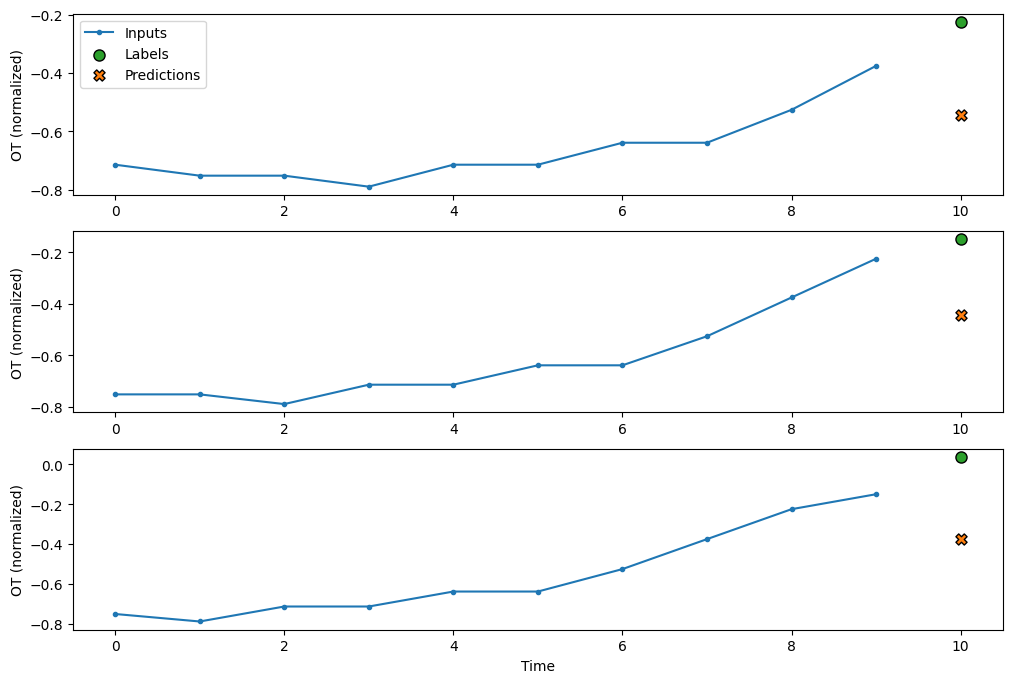

In [94]:
rnn_window.plot(input_x, label_y, rnn_model)